# Otras estructuras de datos

Hasta ahora hemos introducido las listas de Python como estructura que nos permite manipular conjutos de datos. En esta sección veremos otras estructuras de datos e investigaremos cúando es conveniente usar cada una, en concreto vamos a ver
- tuplas 
- diccionarios 
- conjuntos

---
## Tuplas

Las **tuplas** son similares a las listas en el sentido de que nos permiten guardar un número arbitrario de objetos y acceder a los mismos mediante índices, es decir, son objetos secuenciales. Para definir una tupla utilizamos paréntesis `()`

In [ ]:
foo = (1, "b")

Al igual que con las listas, podemos incluir expresiones que se evaluarán antes de formar la tupla

In [ ]:
bar = (1 is None, "fjkdsljfd".islower(), 2 in [1, 4, 5, 3])

In [ ]:
bar

(False, True, False)

In [ ]:
isinstance(bar, tuple)

True

In [ ]:
type(foo)

tuple

Las tuplas son utilizadas para guardar una colección de datos en una estructura simple e **inmutable**, es decir, no podremos modificarlas una vez sean creadas: ni reemplezar, añadir o borrar sus elementos. Dicho de otro modo, es un único objeto formado por distintas partes más que una colección de distintos objetos como una lista. 

:::{exercise}
:label: other-data-structures-tuples-inmmutable

¿Qué error obtenemos al intentar modificar un objeto de una tupla?

:::

:::{exercise}
:label: other-data-structures-tuples-inmmutable-2

Las tuplas son objetos inmutables pero, ¿pueden los objetos que forman la tupla ser mutables? 

:::

Por consistencia, existen las tuplas de longitud 0 y 1

In [ ]:
zero_tuple = ()
one_tuple = (5,) # notemos la coma

Aunque podemos utilizar índices numéricos para acceder a los elementos de la tupla, es más común *deshacer* la tupla en variables 

In [ ]:
holding = ('GOOG', 100, 490.10)
address = ('www.python.org', 80)

name, shares, price = holding
host, port = address

> Esta misma sintaxis se puede utilizar para hacer varias asignaciones a la vez
```
a, b = 1, None
```

In [ ]:
isinstance(1, (bool, int))

True

---
## Trabajando con secuencias 

Ya hemos visto tres tipos secuenciales: cadenas, listas y tuplas. Vamos a dedicar un apartado a repasar las principales operaciones que podemos realizar con objetos secuenciales

### Comprobar pertenencia 

Lo haremos a través del operador `in` y su negación `not in`

In [ ]:
# con tuplas
x = (1, 3, 5)
3 in x

True

In [ ]:
# con cadenas 
"cat" in "the cat in the hat"
True

True

In [ ]:
# con listas 
[1, 2] in [1, 2, 3, 4]

False

In [ ]:
[1, 2] in [None, [1, 2], None]

True

### Obtener el índice de la primera instancia de un objeto

Mediante el método `index`

In [ ]:
"cat cat cat".index("cat")

0

In [ ]:
[1, 2, "moo"].index("m")

ValueError: ignored

### Contar el número de ocurrencias 

Utilizaremos el método `count`

In [ ]:
"the cat in the hat".count("h")

3

### Indexado y *slicing*

Como ya hemos visto, podemos acceder a objetos individuales utilizando in índice entero que empieza en cero. Este índice puede ser negativo si queremos buscar desde el final de la secuencia 

In [ ]:
l = [1, 1, 2, 3, 5, 8, 13, 21]
l[-1]

21

Podemos ir más allá y pedir un subconjunto de la sucencia con las operaciones de *slicing*, cuya sintaxis básica es `seq[start:stop:step]`

In [ ]:
seq = "abcdefg"
seq[0:4:1]

'abcd'

In [ ]:
seq[::2]

'aceg'

Por defecto, `start=0`, `stop=len(seq)` y `step=1`. Si utilizamos valores negativos para `step` invertiremos el orden de la secuencia

In [ ]:
seq[::-1]

'gfedcba'

Aunque la sintaxis con `:` es la más frecuente, está bien saber que en Python existe el objeto de tipo `slice` para definir nuestra selección de forma independiente a la secuencia. Para ello utilizamos el tipo `slice` con los tres argumentos que hemos visto: `start`, `stop` y `step`.

In [ ]:
reverse = slice(None, None, -1)

In [ ]:
type(reverse)

slice

:::{exercise}
:label: other-data-structures-slices

¿Qué error obtenemos cuando intentamos acceder a un índice que no existe para una secuencia?

:::

:::{exercise}
:label: other-data-structures-slices-2

Considera la siguiente tupla

```
x = (0, 2, 4, 6, 8)
```

Indexa o utiliza slides para obtener
1. `0`
2. `8`
3. `(2, 4, 6)`
4. `(4,)`
5. `4`
6. `4` utilizando un índice negativo
7. `(6, 8)`
8. `(2, 6)`
9. `(8, 6, 4, 2)`

:::

:::{exercise}
:label: other-data-structures-slices-3

Dada una tupla `x` que contenga el número `5`, escribe las instrucciones necesarias para reemplazar la primera instancia de `5` por `-5`.

:::

:::{exercise}
:label: other-data-structures-slices-4

Dada una secuencia `seq` y un índice negativo `neg_index`, escribe la fórmula que nos daría el índice positivo correspondiente. 

:::

---
## Diccionarios



Un **diccionario** es un objeto que nos permite guardar campos informados mediante una clave. Para crearlos escribimos pares de clave - valor separados por `:` entre corchetes 

In [17]:
prices = {
    "GOOG": 490.1, 
    "AAPL": 123.5, 
    "IBM": 91.5, 
    "MSFT": 52.13
}

# diccionario vacío 
empty_dict = {}

Se pueden crear también diccionarios a partir del constructor `dict`, que acepta un iterable de pares de clave-valor empaquetados en una secuencia.   

In [18]:
fruit_or_veggie = dict([("apple", "fruit"), ("carrot", "vegetable")])

---
## Comparación complejidad computacional 

Vamos a comparar las diferentes estructuras de datos que hemos visto en cuanto a su tiempo de cómputo para diferentes tareas

### Pertenencia


In [11]:
import time
import numpy as np

def get_membership_time_from_range(i):
    iterable = range(i)
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_list(i):
    iterable = list(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_set(i):
    iterable = set(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_tuple(i):
    iterable = tuple(range(i))
    execution_time = get_membership_time_from_iterable(i - 1, iterable)
    return execution_time

def get_membership_time_from_iterable(i, iterable, repeat=10):
    execution_times = []
    for _ in range(repeat):
        start = time.time()
        i in iterable
        end = time.time()
        execution_time = end - start
        execution_times.append(execution_time)
    mean_execution_time = np.mean(execution_times)
    return mean_execution_time

In [12]:


import numpy as np
import matplotlib.pyplot as plt

n = [10**i for i in range(8)]
t_range = [get_membership_time_from_range(i) for i in n]
t_list = [get_membership_time_from_list(i) for i in n]
t_set = [get_membership_time_from_set(i) for i in n]
t_tuple = [get_membership_time_from_tuple(i) for i in n]

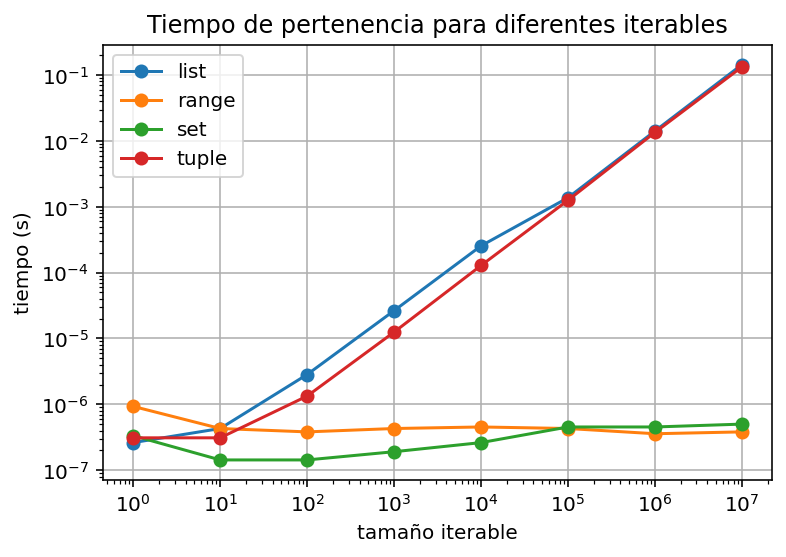

In [13]:
%config InlineBackend.figure_format = "retina"

fig, ax = plt.subplots()
ax.plot(n, t_list, "o-", label="list")
ax.plot(n, t_range, "o-", label="range")
ax.plot(n, t_set, "o-", label="set")
ax.plot(n, t_tuple, "o-", label="tuple")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("tamaño iterable")
ax.set_ylabel("tiempo (s)")
ax.set_title("Tiempo de pertenencia para diferentes iterables")
ax.grid(True)
ax.legend()
fig.show()